# **1. Perkenalan Dataset**

Dataset yang digunakan dalam eksperimen ini adalah **Telco Customer Churn** dari Kaggle.

**Deskripsi Dataset:**
- **Sumber:** Kaggle - WA_Fn-UseC_-Telco-Customer-Churn.csv
- **Problem Type:** Binary Classification
- **Target Variable:** Churn (Yes/No)
- **Jumlah Fitur:** 21 kolom (1 customerID, 19 features, 1 target)
- **Deskripsi:** Dataset ini berisi informasi pelanggan perusahaan telekomunikasi, termasuk informasi demografis, layanan yang digunakan, dan status churn.

**Tujuan:**
Memprediksi apakah pelanggan akan churn (berhenti berlangganan) atau tidak berdasarkan karakteristik pelanggan dan layanan yang digunakan.

# **2. Import Library**

Import semua library yang diperlukan untuk analisis data dan preprocessing.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# **3. Memuat Dataset**

Load dataset CSV dan tampilkan informasi dasar tentang data.

In [2]:
# Load dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display basic information
print("Dataset Shape:", df.shape)
print("\n" + "="*50)
print("Sample Data (5 baris pertama):")
print("="*50)
df.head()

Dataset Shape: (7043, 21)

Sample Data (5 baris pertama):


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Display column names and data types
print("Informasi Kolom:")
print("="*50)
df.info()

Informasi Kolom:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 no

# **4. Exploratory Data Analysis (EDA)**

Melakukan analisis eksplorasi untuk memahami karakteristik dataset.

## 4.1 Statistik Deskriptif

In [4]:
# Descriptive statistics for numerical features
print("Statistik Deskriptif - Fitur Numerik:")
print("="*50)
df.describe()

Statistik Deskriptif - Fitur Numerik:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
# Descriptive statistics for categorical features
print("Statistik Deskriptif - Fitur Kategorikal:")
print("="*50)
df.describe(include='object')

Statistik Deskriptif - Fitur Kategorikal:


,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


## 4.2 Identifikasi Missing Values

In [6]:
# Check for missing values
print("Missing Values:")
print("="*50)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percentage
})
print(missing_df[missing_df['Missing Count'] > 0])

if missing_df['Missing Count'].sum() == 0:
    print("\nTidak ada missing values yang terdeteksi oleh isnull()")
    print("Akan dilakukan pengecekan lebih lanjut untuk nilai kosong atau spasi")

Missing Values:
Empty DataFrame
Columns: [Missing Count, Percentage]
Index: []

Tidak ada missing values yang terdeteksi oleh isnull()
Akan dilakukan pengecekan lebih lanjut untuk nilai kosong atau spasi


In [7]:
# Check for empty strings or whitespace in object columns
print("\nPengecekan Empty String / Whitespace:")
print("="*50)
for col in df.select_dtypes(include='object').columns:
    empty_count = df[col].str.strip().eq('').sum()
    if empty_count > 0:
        print(f"{col}: {empty_count} empty values")


Pengecekan Empty String / Whitespace:
TotalCharges: 11 empty values


## 4.3 Distribusi Target Variable (Churn)

Distribusi Target Variable (Churn):
No:  5174 (73.46%)
Yes: 1869 (26.54%)


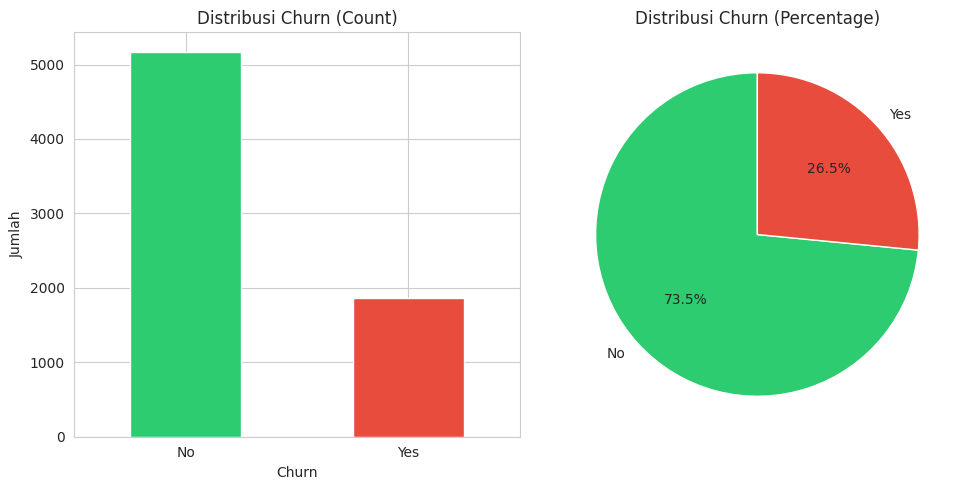

In [8]:
# Target distribution
print("Distribusi Target Variable (Churn):")
print("="*50)
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

print(f"No:  {churn_counts['No']} ({churn_percentage['No']:.2f}%)")
print(f"Yes: {churn_counts['Yes']} ({churn_percentage['Yes']:.2f}%)")

# Visualization
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
churn_counts.plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Distribusi Churn (Count)')
plt.xlabel('Churn')
plt.ylabel('Jumlah')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%',
        colors=['#2ecc71', '#e74c3c'], startangle=90)
plt.title('Distribusi Churn (Percentage)')

plt.tight_layout()
plt.show()

## 4.4 Analisis Fitur Numerik

In [9]:
# Identify numerical features
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("Fitur Numerik:")
print(numerical_features)

Fitur Numerik:
['tenure', 'MonthlyCharges', 'TotalCharges']


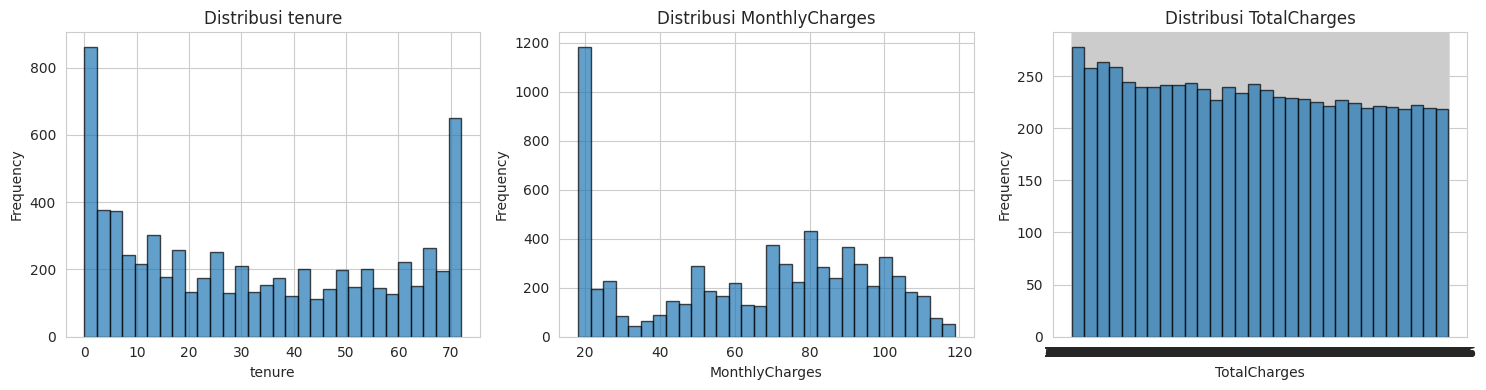

In [10]:
# Distribution of numerical features
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, col in enumerate(numerical_features):
    axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'Distribusi {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

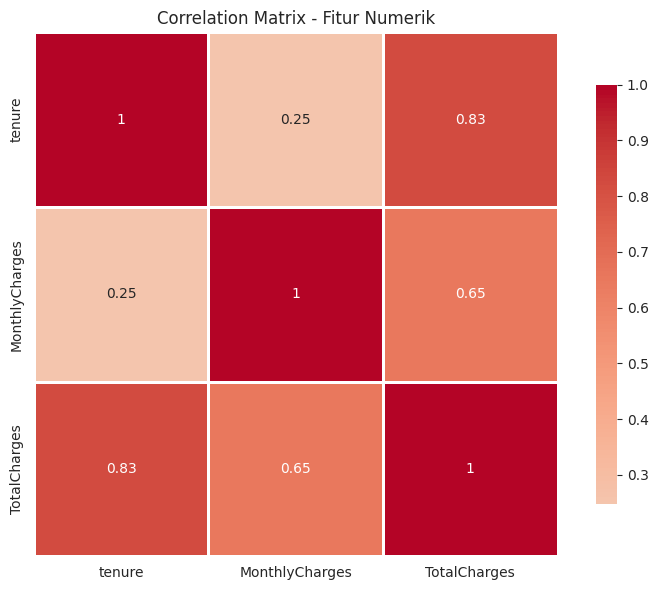


Correlation Matrix:
                 tenure  MonthlyCharges  TotalCharges
tenure          1.00000        0.247900      0.825880
MonthlyCharges  0.24790        1.000000      0.651065
TotalCharges    0.82588        0.651065      1.000000


In [11]:
# Correlation between numerical features
plt.figure(figsize=(8, 6))

# Convert TotalCharges to numeric first for correlation
df_corr = df.copy()
df_corr['TotalCharges'] = pd.to_numeric(df_corr['TotalCharges'], errors='coerce')

corr_matrix = df_corr[numerical_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Fitur Numerik')
plt.tight_layout()
plt.show()

print("\nCorrelation Matrix:")
print(corr_matrix)

## 4.5 Analisis Fitur Kategorikal

In [12]:
# Identify categorical features (exclude customerID and target)
categorical_features = df.select_dtypes(include='object').columns.tolist()
categorical_features.remove('customerID')
categorical_features.remove('Churn')

print(f"Jumlah Fitur Kategorikal: {len(categorical_features)}")
print("\nDaftar Fitur Kategorikal:")
for i, col in enumerate(categorical_features, 1):
    print(f"{i}. {col}")

Jumlah Fitur Kategorikal: 16

Daftar Fitur Kategorikal:
1. gender
2. Partner
3. Dependents
4. PhoneService
5. MultipleLines
6. InternetService
7. OnlineSecurity
8. OnlineBackup
9. DeviceProtection
10. TechSupport
11. StreamingTV
12. StreamingMovies
13. Contract
14. PaperlessBilling
15. PaymentMethod
16. TotalCharges


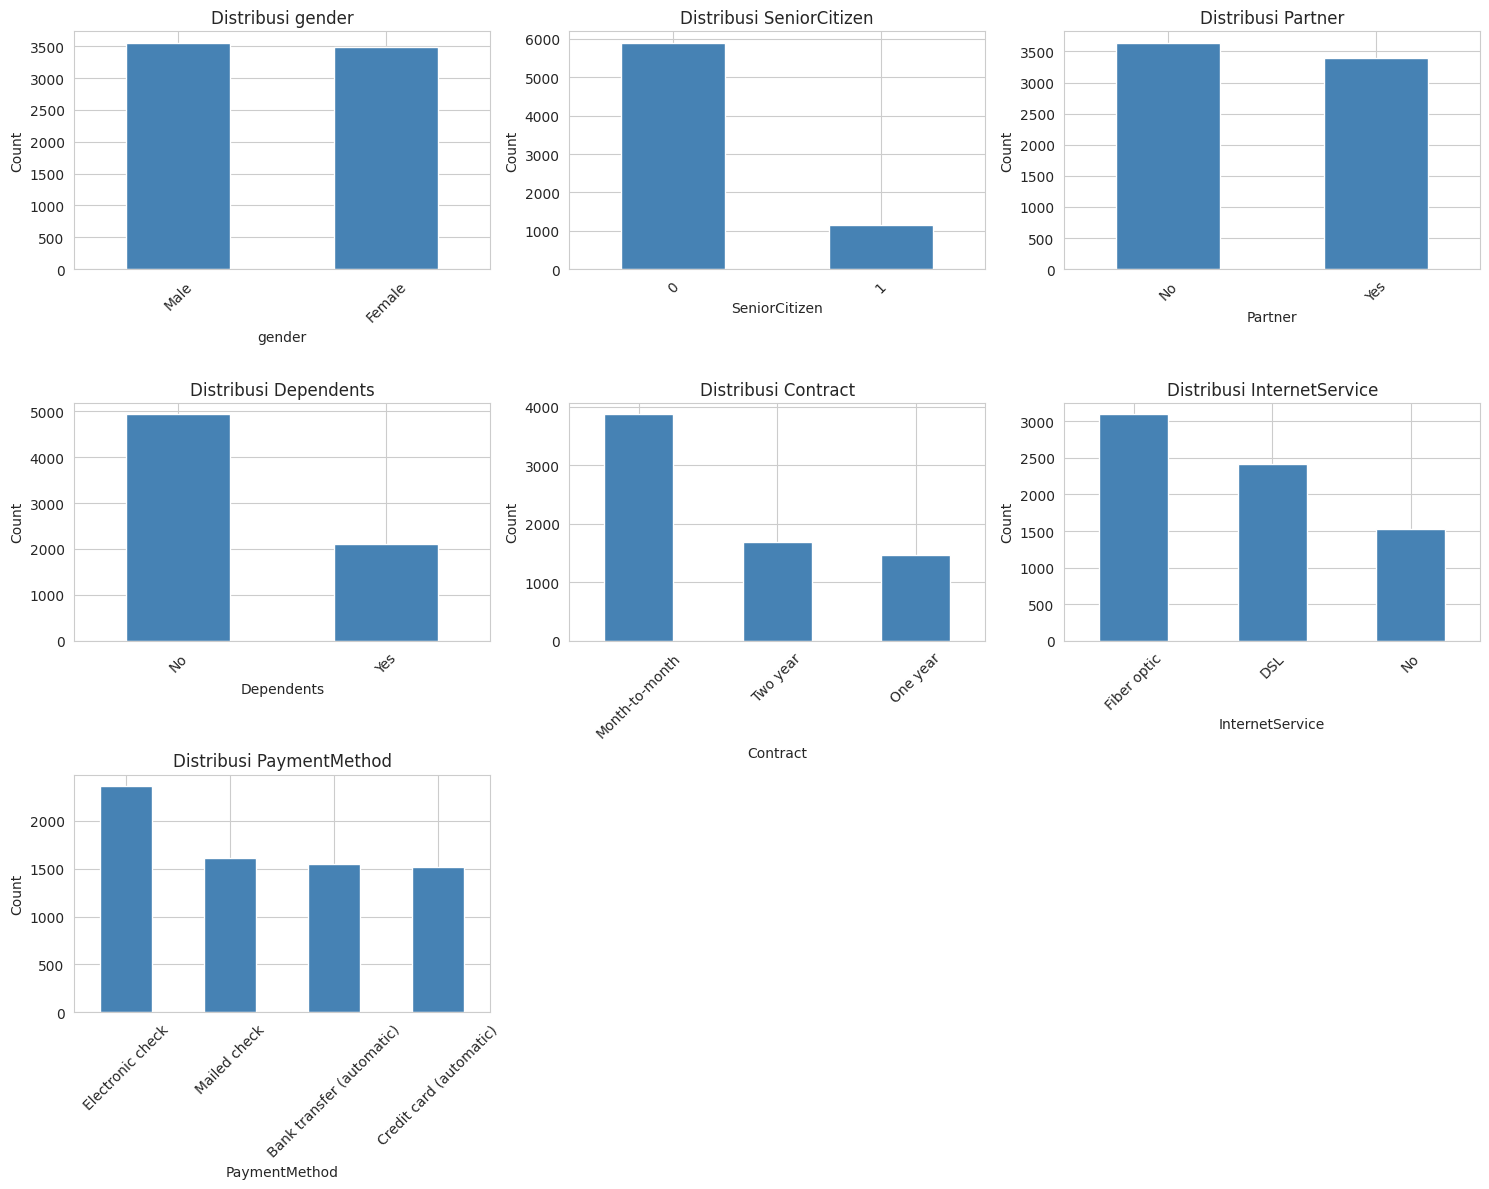

In [13]:
# Distribution of key categorical features
key_categorical = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                   'Contract', 'InternetService', 'PaymentMethod']

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for idx, col in enumerate(key_categorical):
    if idx < len(axes):
        df[col].value_counts().plot(kind='bar', ax=axes[idx], color='steelblue')
        axes[idx].set_title(f'Distribusi {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)

# Hide unused subplots
for idx in range(len(key_categorical), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [14]:
# Churn rate by categorical features
print("Churn Rate berdasarkan Fitur Kategorikal:")
print("="*50)

for col in key_categorical:
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x == 'Yes').sum() / len(x) * 100)
    print(f"\n{col}:")
    print(churn_rate.round(2))

Churn Rate berdasarkan Fitur Kategorikal:

gender:
gender
Female    26.92
Male      26.16
Name: Churn, dtype: float64

SeniorCitizen:
SeniorCitizen
0    23.61
1    41.68
Name: Churn, dtype: float64

Partner:
Partner
No     32.96
Yes    19.66
Name: Churn, dtype: float64

Dependents:
Dependents
No     31.28
Yes    15.45
Name: Churn, dtype: float64

Contract:
Contract
Month-to-month    42.71
One year          11.27
Two year           2.83
Name: Churn, dtype: float64

InternetService:
InternetService
DSL            18.96
Fiber optic    41.89
No              7.40
Name: Churn, dtype: float64

PaymentMethod:
PaymentMethod
Bank transfer (automatic)    16.71
Credit card (automatic)      15.24
Electronic check             45.29
Mailed check                 19.11
Name: Churn, dtype: float64


# **5. Data Preprocessing**

Melakukan preprocessing data untuk mempersiapkan data sebelum modeling.

## 5.1 Konversi TotalCharges ke Numerik

In [15]:
# Check TotalCharges data type
print("Tipe data TotalCharges sebelum konversi:")
print(df['TotalCharges'].dtype)
print("\nSample values:")
print(df['TotalCharges'].head(10))

Tipe data TotalCharges sebelum konversi:
object

Sample values:
0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
5      820.5
6     1949.4
7      301.9
8    3046.05
9    3487.95
Name: TotalCharges, dtype: object


In [16]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print("Tipe data TotalCharges setelah konversi:")
print(df['TotalCharges'].dtype)

# Check for NaN values after conversion
nan_count = df['TotalCharges'].isnull().sum()
print(f"\nJumlah NaN setelah konversi: {nan_count}")

if nan_count > 0:
    print("\nBaris dengan TotalCharges NaN:")
    print(df[df['TotalCharges'].isnull()][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())

Tipe data TotalCharges setelah konversi:
float64

Jumlah NaN setelah konversi: 11

Baris dengan TotalCharges NaN:
      customerID  tenure  MonthlyCharges  TotalCharges
488   4472-LVYGI       0           52.55           NaN
753   3115-CZMZD       0           20.25           NaN
936   5709-LVOEQ       0           80.85           NaN
1082  4367-NUYAO       0           25.75           NaN
1340  1371-DWPAZ       0           56.05           NaN


## 5.2 Handle Missing Values

In [17]:
# Handle missing values in TotalCharges
# Strategy: Fill with median for rows where tenure is very low

print("Handling missing values...")
print("="*50)

# Check if there are missing values
if df['TotalCharges'].isnull().sum() > 0:
    # Fill missing TotalCharges with median
    median_total_charges = df['TotalCharges'].median()
    df['TotalCharges'].fillna(median_total_charges, inplace=True)
    print(f"Missing values di TotalCharges diisi dengan median: {median_total_charges:.2f}")
else:
    print("Tidak ada missing values yang perlu ditangani")

# Verify no missing values remain
print("\nVerifikasi Missing Values:")
print(df.isnull().sum().sum())
print("Total missing values: 0" if df.isnull().sum().sum() == 0 else f"Total missing values: {df.isnull().sum().sum()}")

Handling missing values...
Missing values di TotalCharges diisi dengan median: 1397.47

Verifikasi Missing Values:
0
Total missing values: 0


## 5.3 Drop CustomerID

In [18]:
# Drop customerID as it's not useful for modeling
print("Dropping customerID column...")
df_processed = df.drop('customerID', axis=1)
print(f"Shape setelah drop customerID: {df_processed.shape}")

Dropping customerID column...
Shape setelah drop customerID: (7043, 20)


## 5.4 Encoding Fitur Kategorikal

In [19]:
# Create a copy for encoding
df_encoded = df_processed.copy()

# Identify categorical columns (exclude target)
categorical_cols = df_encoded.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('Churn')  # Remove target from encoding list

print(f"Jumlah kolom kategorikal yang akan diencode: {len(categorical_cols)}")
print("\nKolom kategorikal:")
for col in categorical_cols:
    print(f"- {col}: {df_encoded[col].nunique()} unique values")

Jumlah kolom kategorikal yang akan diencode: 15

Kolom kategorikal:
- gender: 2 unique values
- Partner: 2 unique values
- Dependents: 2 unique values
- PhoneService: 2 unique values
- MultipleLines: 3 unique values
- InternetService: 3 unique values
- OnlineSecurity: 3 unique values
- OnlineBackup: 3 unique values
- DeviceProtection: 3 unique values
- TechSupport: 3 unique values
- StreamingTV: 3 unique values
- StreamingMovies: 3 unique values
- Contract: 3 unique values
- PaperlessBilling: 2 unique values
- PaymentMethod: 4 unique values


In [20]:
# Apply Label Encoding to all categorical features
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

print("Label Encoding selesai!")
print("\nSample encoded data:")
print(df_encoded.head())

Label Encoding selesai!

Sample encoded data:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0   

In [21]:
# Encode target variable (Churn)
print("Encoding target variable (Churn)...")
le_target = LabelEncoder()
df_encoded['Churn'] = le_target.fit_transform(df_encoded['Churn'])

print("Mapping:")
for i, label in enumerate(le_target.classes_):
    print(f"  {label} -> {i}")

print("\nDistribusi target setelah encoding:")
print(df_encoded['Churn'].value_counts().sort_index())

Encoding target variable (Churn)...
Mapping:
  No -> 0
  Yes -> 1

Distribusi target setelah encoding:
Churn
0    5174
1    1869
Name: count, dtype: int64


## 5.5 Scaling Fitur Numerik

In [22]:
# Prepare data for scaling
df_scaled = df_encoded.copy()

# Define numerical features to scale
numerical_features_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

print("Fitur numerik yang akan discaling:")
print(numerical_features_to_scale)
print("\nStatistik sebelum scaling:")
print(df_scaled[numerical_features_to_scale].describe())

Fitur numerik yang akan discaling:
['tenure', 'MonthlyCharges', 'TotalCharges']

Statistik sebelum scaling:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7043.000000
mean     32.371149       64.761692   2281.916928
std      24.559481       30.090047   2265.270398
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    402.225000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3786.600000
max      72.000000      118.750000   8684.800000


In [23]:
# Apply StandardScaler
scaler = StandardScaler()
df_scaled[numerical_features_to_scale] = scaler.fit_transform(df_scaled[numerical_features_to_scale])

print("Scaling selesai!")
print("\nStatistik setelah scaling:")
print(df_scaled[numerical_features_to_scale].describe())

Scaling selesai!

Statistik setelah scaling:
             tenure  MonthlyCharges  TotalCharges
count  7.043000e+03    7.043000e+03  7.043000e+03
mean  -2.421273e-17   -6.406285e-17 -1.488074e-17
std    1.000071e+00    1.000071e+00  1.000071e+00
min   -1.318165e+00   -1.545860e+00 -9.991203e-01
25%   -9.516817e-01   -9.725399e-01 -8.298459e-01
50%   -1.372744e-01    1.857327e-01 -3.904632e-01
75%    9.214551e-01    8.338335e-01  6.642871e-01
max    1.613701e+00    1.794352e+00  2.826743e+00


## 5.6 Pemisahan Fitur dan Target

In [24]:
# Separate features and target
X = df_scaled.drop('Churn', axis=1)
y = df_scaled['Churn']

print("Pemisahan fitur dan target selesai!")
print("="*50)
print(f"Shape X (features): {X.shape}")
print(f"Shape y (target): {y.shape}")
print(f"\nJumlah fitur: {X.shape[1]}")
print(f"Jumlah sampel: {X.shape[0]}")

Pemisahan fitur dan target selesai!
Shape X (features): (7043, 19)
Shape y (target): (7043,)

Jumlah fitur: 19
Jumlah sampel: 7043


In [25]:
# Verify all data is numeric
print("\nVerifikasi tipe data:")
print("="*50)
print("Features (X):")
print(X.dtypes.value_counts())
print("\nTarget (y):")
print(y.dtype)


Verifikasi tipe data:
Features (X):
int64      16
float64     3
Name: count, dtype: int64

Target (y):
int64


In [26]:
# Final check - no missing values
print("\nVerifikasi final - Missing values:")
print("="*50)
print(f"Missing values di X: {X.isnull().sum().sum()}")
print(f"Missing values di y: {y.isnull().sum()}")

if X.isnull().sum().sum() == 0 and y.isnull().sum() == 0:
    print("\nData siap untuk modeling!")


Verifikasi final - Missing values:
Missing values di X: 0
Missing values di y: 0

Data siap untuk modeling!


## 5.7 Simpan Data Hasil Preprocessing

In [27]:
# Save preprocessed data for modeling
df_final = pd.concat([X, y], axis=1)
df_final.to_csv('preprocessed_data.csv', index=False)

print("Data hasil preprocessing berhasil disimpan!")
print(f"File: preprocessed_data.csv")
print(f"Shape: {df_final.shape}")
print("\nSample data:")
print(df_final.head())

Data hasil preprocessing berhasil disimpan!
File: preprocessed_data.csv
Shape: (7043, 20)

Sample data:
   gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        1           0 -1.277445             0   
1       1              0        0           0  0.066327             1   
2       1              0        0           0 -1.236724             1   
3       1              0        0           0  0.514251             0   
4       0              0        0           0 -1.236724             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  Streami

# **6. Summary**

## Dataset Summary:
- Dataset awal: 7043 baris, 21 kolom
- Target: Churn (binary classification)
- Fitur numerik: tenure, MonthlyCharges, TotalCharges
- Fitur kategorikal: 16 kolom

## Preprocessing Steps:
1. Konversi TotalCharges dari object ke numeric
2. Handle missing values (mengisi dengan median)
3. Drop customerID (tidak relevan untuk modeling)
4. Encoding fitur kategorikal menggunakan Label Encoding
5. Encoding target variable (No=0, Yes=1)
6. Scaling fitur numerik menggunakan StandardScaler
7. Pemisahan fitur (X) dan target (y)

## Output:
- Data final: semua numerik, tidak ada missing values
- File tersimpan: preprocessed_data.csv
- Data siap untuk tahap modeling dengan MLflow